<a href="https://colab.research.google.com/github/elejalea/CompLing/blob/master/%D0%98%D0%BD%D1%82%D0%B5%D0%BD%D1%81%D0%B8%D0%B2_09_03_11_03_%D0%97%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%962_%D0%9E%D0%B1%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%BA%D0%B0_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install terra_ai

     |████████████████████████████████| 102kB 4.4MB/s 


In [ ]:
from terra_ai import терра_ии

Все необходимые библиотеки установлены и готовы к работе


# Определение заболевания по симптомам

In [ ]:
# Загружаем базу симптомов заболеваний
терра_ии.загрузить_базу('СИМПТОМЫ ЗАБОЛЕВАНИЙ')

Загрузка данных
Это может занять несколько минут...
Загрузка данных завершена 

url: https://storage.googleapis.com/aiu_bucket/symptoms.zip



In [ ]:
# Выводим примеры
терра_ии.показать_примеры(база = 'симптомы')

В данной базе содержатся симптомы следующих заболеваний:
['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холецистит', 'Эзофагит', 'Энтерит', 'Язва']

Пример симптомов случайного заболевания:
Заболевание:  Эзофагит
Симптомы:
     * затруднения и болезненные ощущения при глотании изжога боли во рту ощущения чего-то застрявшего в го


In [ ]:
количество_анализируемых_слов = 1100
размер_окна = 50
шаг = 10
# Создаем выборки для обучения нейронной сети
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки) = терра_ии.создать_текстовые_выборки(
    количество_анализируемых_слов,
    размер_окна,
    шаг)

Формирование выборки завершено


In [ ]:
# Создаем нейронную сеть
ветвь1 = 'Эмбеддинг-100-'+str(количество_анализируемых_слов)+'-'+str(размер_окна)+' Выравнивающий Полносвязный-200'
ветвь2 = 'Полносвязный-4096 Полносвязный-256 Полносвязный-64' 
ветвь3 = 'Полносвязный-100'

нейронка1 = терра_ии.создать_составную_сеть(
    обучающая_выборка, метки_обучающей_выборки,
    ветвь1, ветвь2, ветвь3)


Схема модели:


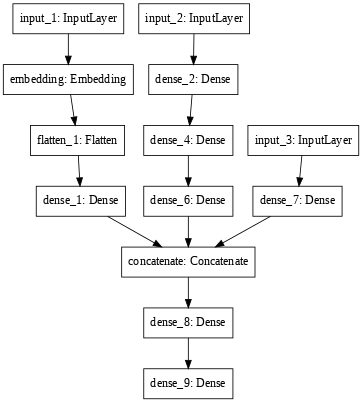

In [ ]:
терра_ии.схема_модели(нейронка1)

Эпоха №1  Время обучения: 11.05c Точность на обучающей выборке: 98.75%       Точность на проверочной выборке: 83.13%
Эпоха №2  Время обучения: 8.87c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 84.38%
Эпоха №3  Время обучения: 9.05c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 84.38%
Эпоха №4  Время обучения: 9.03c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 85.0%
Эпоха №5  Время обучения: 9.0c   Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 85.0%
Эпоха №6  Время обучения: 8.96c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 84.38%
Эпоха №7  Время обучения: 8.8c   Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.25%
Эпоха №8  Время обучения: 9.12c  Точность на обучающей выборке: 100.0%       Точность на проверочной выборке: 86.87%
Эпоха №9  Время обучения: 8.88c  Точность на обучающей выборке: 10

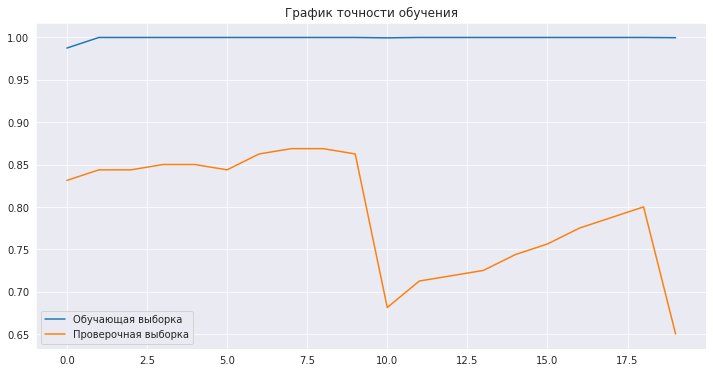

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели(
    нейронка1,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 16,
    количество_эпох = 20)

In [ ]:
# Демонстрация результата работы нейронной сети
симптомы = 'Ноющие или схваткообразные боли слабоинтенсивные в\
    эпигастральной области, чаще возникают натощак или\
    непосредственно после еды\
    Постоянная изжога особенно в ночные и утренние часы, отрыжка\
    кислым Тошнота, редко рвота желудочным содержимым\
    Отрыжка воздух, кислым или горьким привкусом\
    Тяжесть в эпигастральной области после приема пищи, чувство\
    быстрого наполнения желудка\
    Неприятный привкус во рту, горечь\
    Снижение аппетита.'

терра_ии.тест_модели_симптомы(нейронка1, размер_окна, шаг,
                              симптомы, классы = ['Аппендицит', 'Гастрит', 'Гепатит', 'Дуоденит', 'Колит', 'Панкреатит', 'Холецистит', 'Эзофагит', 'Энтерит', 'Язва'])

Аппендицит     -  0.0 %
Гастрит        -  95.34 %
Гепатит        -  0.0 %
Дуоденит       -  0.02 %
Колит          -  0.0 %
Панкреатит     -  0.0 %
Холецистит     -  0.0 %
Эзофагит       -  0.0 %
Энтерит        -  0.0 %
Язва           -  4.64 %

Диагноз: Гастрит - 95.34%


# Предсказание цены квартиры

In [ ]:
# Загружаем базу квартир
терра_ии.загрузить_базу(база = 'КВАРТИРЫ', справка = True)

Загрузка данных завершена 

url: https://storage.googleapis.com/aiu_bucket/moscow.csv
Загружена база квартир



In [ ]:
# Показываем примеры
терра_ии.показать_пример_квартиры(количество=3)

* Пример объявления: 

Колчиество комнат:  1
Площадь квартиры:   39.9/11.5/20.4
Метро/ЖД станция:   Савеловская м.
От станции:         2т
Дом:                12/14 М
Балкон:             
Санузел:            С
Примечание:         Новостройка! Продается 1-комн. кв-ра площадью 39,86 кв.м, (Корпус 3, Секция 1) 12 этаж 14-этажного дома в ЖК "Шереметьевский" от Группы ПИК. Жилой комплекс "Шереметьевский" расположен в Бутырском районе Москвы, в 10 минутах пешком от станции метро "Савёловская". Дорога до центра займет 15 минут езды. Квартальная застройка включает 15 корпусов переменной этажности (11-14 этажей), три детских сада, школу, поликлинику и подземный паркинг на 1276 мест. Корпуса имеют просторные подъезды с высокими потолками, витражным остеклением, современным дизайном и двумя входами: со двора и улицы. Входы расположены на уровне земли, без ступеней и пандусов. На первых этажах разместятся магазины и сервисы услуг. В зелёных дворах-парках без автомобилей предусмотрены детские площад

In [ ]:
# Создаем выборки
(обучающая_выборка, метки_обучающей_выборки), (тестовая_выборка, метки_тестовой_выборки), инструменты = терра_ии.создать_выборки_квартир()

In [ ]:
ветвь1 = 'Полносвязный-100-relu Полносвязный-50-linear'
ветвь2 = 'Полносвязный-500-linear'
финальная_часть = 'Полносвязный-1000-relu Полносвязный-500-relu Полносвязный-100-relu Полносвязный-1-linear'
нейронка = терра_ии.создать_составную_сеть_квартиры(обучающая_выборка, ветвь1, ветвь2, финальная_часть)

Схема модели:


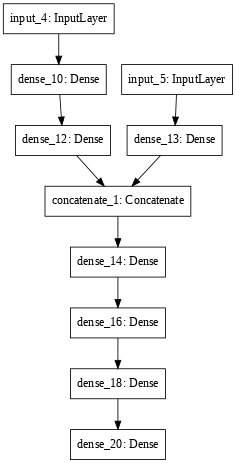

In [ ]:
# Выводим схему модели
терра_ии.схема_модели(нейронка)

Эпоха №1  Время обучения: 5.37c  Ошибка на обучающей выборке: 1.603млн       Ошибка на проверочной выборке: 1.532млн
Эпоха №2  Время обучения: 3.99c  Ошибка на обучающей выборке: 1.477млн       Ошибка на проверочной выборке: 1.467млн
Эпоха №3  Время обучения: 4.01c  Ошибка на обучающей выборке: 1.163млн       Ошибка на проверочной выборке: 1.303млн
Эпоха №4  Время обучения: 3.99c  Ошибка на обучающей выборке: 1.234млн       Ошибка на проверочной выборке: 1.198млн
Эпоха №5  Время обучения: 3.91c  Ошибка на обучающей выборке: 1.667млн       Ошибка на проверочной выборке: 1.778млн
Эпоха №6  Время обучения: 3.92c  Ошибка на обучающей выборке: 1.006млн       Ошибка на проверочной выборке: 1.254млн
Эпоха №7  Время обучения: 3.96c  Ошибка на обучающей выборке: 0.92млн        Ошибка на проверочной выборке: 1.071млн
Эпоха №8  Время обучения: 3.93c  Ошибка на обучающей выборке: 0.913млн       Ошибка на проверочной выборке: 1.027млн
Эпоха №9  Время обучения: 3.91c  Ошибка на обучающей выборке: 0.

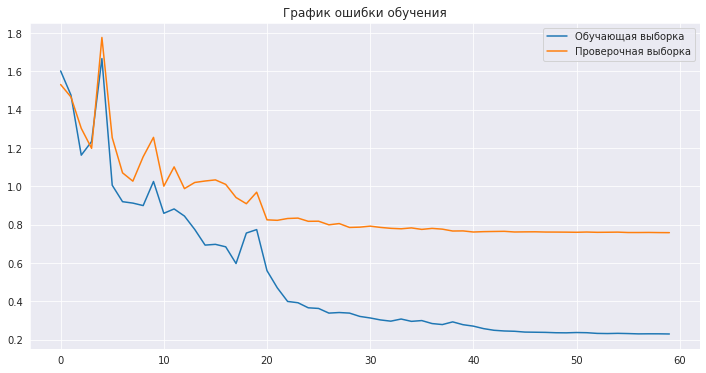

In [ ]:
# Обучаем модель
эксперимент_1 = терра_ии.обучение_модели_квартиры(
    нейронка,
    обучающая_выборка, метки_обучающей_выборки,
    тестовая_выборка, метки_тестовой_выборки,
    размер_пакета = 128,
    количество_эпох = 20,
    инструменты = инструменты)

In [ ]:
#@title Тестирование модели: выберите параметры
метро = "\u0421\u043F\u0430\u0440\u0442\u0430\u043A \u043C." #@param ['Авиамоторная м.', 'Автозаводская м.', 'Автозаводская м. (МЦК)', 'Академическая м.', 'Алабушево станция', 'Александровский Сад м.', 'Алексеевская м.', 'Алма-Атинская м.', 'Алтуфьево м.', 'Андроновка м. (МЦК)', 'Аннино м.', 'Апрелевка станция', 'Арбатская м.', 'Аэропорт (старая) станция', 'Аэропорт Внуково станция', 'Аэропорт м.', 'Бабушкинская м.', 'Багратионовская м.', 'Балтийская м. (МЦК)', 'Баррикадная м.', 'Бауманская м.', 'Беговая м.', 'Бекасово-1 станция', 'Белокаменная м. (МЦК)', 'Беломорская м.', 'Белорусская м.', 'Беляево м.', 'Бибирево м.', 'Библиотека им.Ленина м.', 'Битцевский парк м.', 'Борисово м.', 'Боровицкая м.', 'Боровское шоссе м.', 'Ботанический сад м.', 'Ботанический сад м. (МЦК)', 'Братиславская м.', 'Бульвар Адмирала Ушакова м.', 'Бульвар Дмитрия Донского м.', 'Бульвар Рокоссовского м.', 'Бульвар Рокоссовского м. (МЦК)', 'Бунинская аллея м.', 'Бутырская м.', 'ВДНХ м.', 'Варшавская м.', 'Верхние Котлы м. (МЦК)', 'Верхние Лихоборы м.', 'Весенняя станция', 'Владыкино м.', 'Внуково станция', 'Водный стадион м.', 'Войковская м.', 'Волгоградский проспект м.', 'Волжская м.', 'Волоколамская м.', 'Воробьевы Горы м.', 'Выставочная м.', 'Выхино м.', 'Говорово м.', 'Гривно станция', 'Дачная станция', 'Деловой центр м.', 'Динамо м.', 'Дмитровская м.', 'Добрынинская м.', 'Домодедовская м.', 'Достоевская м.', 'Дубровка м.', 'Дубровка м. (МЦК)', 'Жулебино м.', 'ЗИЛ м. (МЦК)', 'Зорге м. (МЦК)', 'Зябликово м.', 'Измайлово м. (МЦК)', 'Измайловская м.', 'Калужская м.', 'Кантемировская м.', 'Каховская м.', 'Каширская м.', 'Киевская м.', 'Китай-Город м.', 'Кожуховская м.', 'Кокошкино станция', 'Коломенская м.', 'Колхозная станция', 'Коммунарка м.', 'Комсомольская м.', 'Коньково м.', 'Коптево м. (МЦК)', 'Косино м.', 'Котельники м.', 'Красногвардейская м.', 'Краснопресненская м.', 'Красносельская м.', 'Красные ворота м.', 'Крекшино станция', 'Крестьянская Застава м.', 'Кропоткинская м.', 'Крылатское м.', 'Крымская м. (МЦК)', 'Кузнецкий мост м.', 'Кузьминки м.', 'Кунцевская м.', 'Курская м.', 'Кутузовская м.', 'Кутузовская м. (МЦК)', 'Ленинский проспект м.', 'Лермонтовский проспект м.', 'Лесопарковая м.', 'Лихоборы м. (МЦК)', 'Локомотив м. (МЦК)', 'Ломоносовский проспект м.', 'Лубянка м.', 'Лужники м. (МЦК)', 'Лухмановская м.', 'Львовская станция', 'Люблино м.', 'Марксистская м.', 'Марьина Роща м.', 'Марьино м.', 'Маяковская м.', 'Медведково м.', 'Международная м.', 'Менделеевская м.', 'Минская м.', 'Митино м.', 'Мичуринец станция', 'Мичуринский проспект м.', 'Молодежная м.', 'Мякинино м.', 'Нагатинская м.', 'Нагорная м.', 'Нахимовский проспект м.', 'Некрасовка м.', 'Нижегородская м. (МЦК)', 'Нижегородская улица м.', 'Новогиреево м.', 'Новокосино м.', 'Новокузнецкая м.', 'Новопеределкино м.', 'Новослободская м.', 'Новохохловская м. (МЦК)', 'Новоясеневская м.', 'Новые Черемушки м.', 'Озерная м.', 'Окружная м.', 'Окружная м. (МЦК)', 'Окская улица м.', 'Октябрьская м.', 'Октябрьское поле м.', 'Ольховая м.', 'Орехово м.', 'Отрадное м.', 'Охотный ряд м.', 'Павелецкая м.', 'Панфиловская м. (МЦК)', 'Парк Победы м.', 'Парк культуры м.', 'Партизанская м.', 'Первомайская м.', 'Перово м.', 'Петровский парк м.', 'Петровско-Разумовская м.', 'Печатники м.', 'Пионерская м.', 'Планерная м.', 'Площадь Гагарина м. (МЦК)', 'Площадь Ильича м.', 'Площадь Революции м.', 'Победа станция', 'Подольск станция', 'Полежаевская м.', 'Полянка м.', 'Пражская м.', 'Преображенская площадь м.', 'Прокшино м.', 'Пролетарская м.', 'Проспект Вернадского м.', 'Проспект Мира м.', 'Профсоюзная м.', 'Пушкинская м.', 'Пятницкое шоссе м.', 'Раменки м.', 'Рассказовка м.', 'Рассудово станция', 'Речной вокзал м.', 'Рижская м.', 'Римская м.', 'Ростокино м. (МЦК)', 'Румянцево м.', 'Рязанский проспект м.', 'Савеловская м.', 'Савеловская метро', 'Саларьево м.', 'Свиблово м.', 'Севастопольская м.', 'Селигерская м.', 'Семеновская м.', 'Серпуховская м.', 'Силикатная станция', 'Славянский бульвар м.', 'Смоленская м.', 'Сокол м.', 'Соколиная Гора м. (МЦК)', 'Сокольники м.', 'Солнцево м.', 'Спартак м.', 'Спортивная м.', 'Сретенский бульвар м.', 'Стахановская м.', 'Столбово м.', 'Стрешнево м. (МЦК)', 'Строгино м.', 'Студенческая м.', 'Сухаревская м.', 'Сходненская м.', 'Таганская м.', 'Тверская м.', 'Театральная м.', 'Текстильщики м.', 'Теплый стан м.', 'Технопарк м.', 'Тимирязевская м.', 'Толстопальцево станция', 'Третьяковская м.', 'Тропарево м.', 'Трубная м.', 'Тульская м.', 'Тургеневская м.', 'Тушинская м.', 'Угрешская м. (МЦК)', 'Улица 1905 года м.', 'Улица Академика Янгеля м.', 'Улица Горчакова м.', 'Улица Дмитриевского м.', 'Улица Скобелевская м.', 'Улица Старокачаловская м.', 'Университет м.', 'Филатов луг м.', 'Филевский парк м.', 'Фили м.', 'Фонвизинская м.', 'Фрунзенская м.', 'Ховрино м.', 'Хорошево м. (МЦК)', 'Хорошевское м.', 'ЦСКА м.', 'Царицыно м.', 'Цветной бульвар м.', 'Черкизовская м.', 'Чертановская м.', 'Чеховская м.', 'Чистые пруды м.', 'Чкаловская м.', 'Шаболовская м.', 'Шелепиха м.', 'Шелепиха м. (МЦК)', 'Шипиловская м.', 'Шоссе Энтузиастов м.', 'Шоссе Энтузиастов м. (МЦК)', 'Щелковская м.', 'Щербинка станция', 'Щукинская м.', 'Электрозаводская м.', 'Юго-Восточная м.', 'Юго-Западная м.', 'Южная м.', 'Ясенево м.']
до_станции =  18#@param {type:"integer"}
способ_передвижения = "\u043F\u0435\u0448\u043A\u043E\u043C" #@param ['пешком', 'транспорт']
этаж =  8#@param {type:"integer"}
всего_этажей =  14#@param {type:"integer"}
тип_балкона = 'Л' #@param ['Л', 'Б', '2Б', '-', '2Б2Л', 'БЛ', '3Б', '2Л', 'Эрк', 'Б2Л', 'ЭркЛ', '3Л', '4Л', '*Л', '*Б']
тип_санузла = '2' #@param ['2', 'Р', 'С', '-', '2С', '+', '4Р', '2Р', '3С', '4С', '4', '3', '3Р']
площадь = 56 #@param {type:"number"}
описание = '\u043F\u0440\u0435\u043A\u0440\u0430\u0441\u043D\u0430\u044F \u043A\u0432\u0430\u0440\u0442\u0438\u0440\u0430 \u0440\u044F\u0434\u043E\u043C \u0441 \u043F\u0430\u0440\u043A\u043E\u043C' #@param {type:"string"}

In [ ]:
# Тестируем модель
терра_ии.тест_модели_квартиры(
    нейронка, инструменты, 
    метро, до_станции, способ_передвижения, этаж, всего_этажей, тип_балкона, тип_санузла, площадь, описание)

Цена квартиры: 16млн  313тыс рублей
